In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.set_option('display.max_columns', None)
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

df_rc = pd.read_csv('c:/Users/nrise/initial_rcmd.csv')
df_rr = pd.read_csv('c:/Users/nrise/initial_impression.csv')
df_rr_2 = pd.read_csv('c:/Users/nrise/initial_response.csv')

In [140]:
df_rc['grade'] = df_rc['user2_relative_score'] // 30 +1
df_rc['time'] = df_rc['min_rc'] *5

In [150]:
df_pivot = df_rc.pivot_table(index=['grade','time'], values=['cumul_rcmd_users', 'cumul_rcmd_response_users',
                                                             'cumul_rcmd_users_ini_exc', 'cumul_rcmd_response_users_ini_exc']
                             , aggfunc='mean')

In [151]:
df_pivot.head(200)

cumul_rcmd_response_users  cumul_rcmd_response_users_ini_exc  \
grade time                                                                 
1.0   0                     54.903072                           2.038665   
      5                    110.783819                           3.835041   
      10                   144.610697                           5.987759   
      15                   164.854736                           8.585750   
      20                   179.650488                          11.169156   
...                               ...                                ...   
      975                  334.433118                         119.283672   
      980                  335.305386                         119.490867   
      985                  336.603702                         121.164215   
      990                  335.909602                         120.289930   
      995                  338.342871                         122.414402   

            cumul_rcmd_users  cumul_rcmd_users_ini_exc  
grade time                                              
1.0   0           114.932998                  7.964513  
      5           232.087733                 15.612818  
      10          302.896487                 23.175625  
      15          345.522508                 31.410660  
      20          377.376221                 39.192993  
...                      ...                       ...  
      975        1879.809502               1452.551199  
      980        1874.318501               1446.074473  
      985        1881.882772               1454.118652  
      990        1881.705386               1454.480562  
      995        1897.729137               1470.041965  

[200 rows x 4 columns]

In [152]:
df_plot = df_pivot.reset_index()
df_plot = df_plot[df_plot['grade'].isin(range(1, 11))]
df_plot['grade'] = df_plot['grade'].astype(int).astype(str)

custom_labels = ['0-30%','30-60%','60-90%','90%-100%'] 

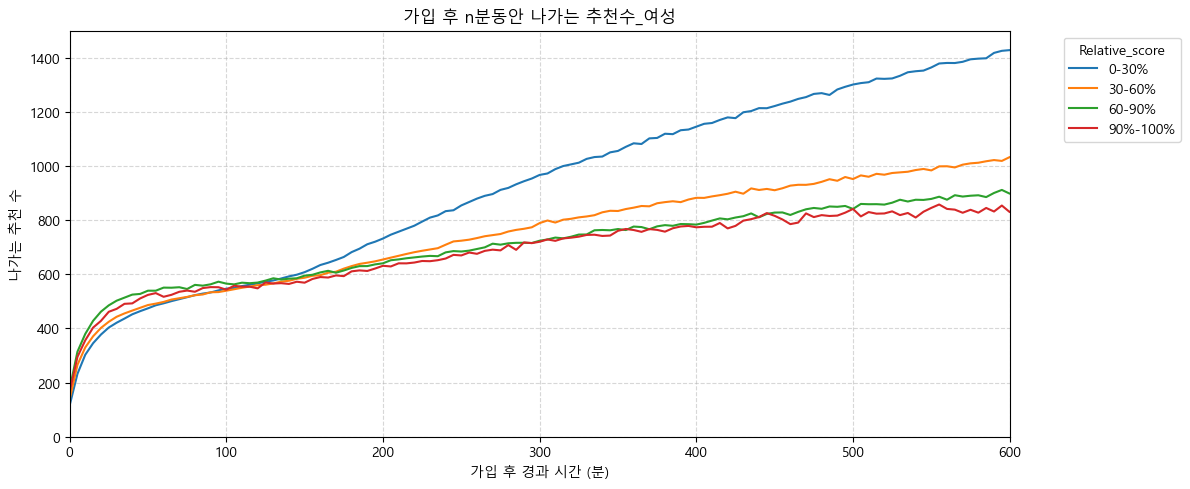

In [195]:
plt.figure(figsize=(12, 5))
ax = sns.lineplot(data=df_plot, x='time', y='cumul_rcmd_users', hue='grade')

plt.title('가입 후 n분동안 나가는 추천수_여성')
plt.xlim(0,600); 
plt.xlabel('가입 후 경과 시간 (분)')
plt.ylim(0,1500); 
plt.ylabel('나가는 추천 수')
plt.grid(True, linestyle='--', alpha=0.5)
handles, _ = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=custom_labels, title='Relative_score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

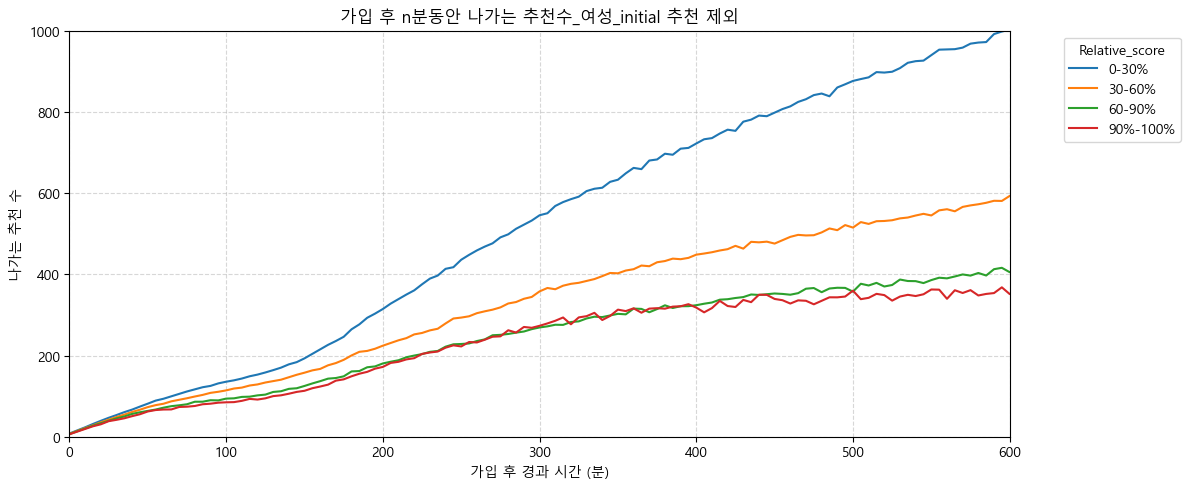

In [154]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_plot, x='time', y='cumul_rcmd_users_ini_exc', hue='grade')

plt.title('가입 후 n분동안 나가는 추천수_여성_initial 추천 제외')
plt.xlim(0,600); 
plt.xlabel('가입 후 경과 시간 (분)')
plt.ylim(0,1000); 
plt.ylabel('나가는 추천 수')
plt.legend(title='relative score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
handles, _ = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=custom_labels, title='Relative_score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


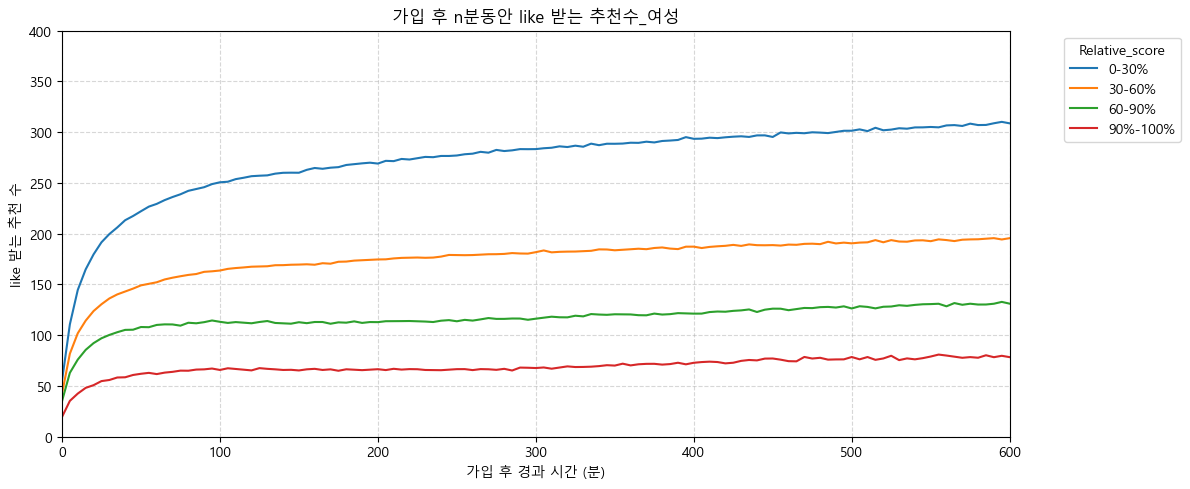

In [158]:

plt.figure(figsize=(12, 5))
sns.lineplot(data=df_plot, x='time', y='cumul_rcmd_response_users', hue='grade')

plt.title('가입 후 n분동안 like 받는 추천수_여성')
plt.xlim(0,600); plt.xlabel('가입 후 경과 시간 (분)')
plt.ylim(0,400); plt.ylabel('like 받는 추천 수')
plt.legend(title='relative score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
handles, _ = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=custom_labels, title='Relative_score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [187]:
df_rr['grade'] = df_rr['relative_score'] // 30 +1
df_rr['time'] = df_rr['min_rc'] *5
df_pivot_2way = df_rr.pivot_table(index=['grade','time'], values=['cumul_rcmd_impression_users', 'cumul_rcmd_impression_users_rcmded'], aggfunc='mean')
df_plot_2way = df_pivot_2way.reset_index()
df_plot_2way = df_plot_2way[df_plot_2way['grade'].isin(range(1, 11))]
df_plot_2way['grade'] = df_plot_2way['grade'].astype(int).astype(str)


df_rr_2['grade'] = df_rr_2['relative_score'] // 30 +1
df_rr_2['time'] = df_rr_2['min_rc'] *5
df_pivot_2way_2 = df_rr_2.pivot_table(index=['grade','time'], values=['cumul_rcmd_response_users', 'cumul_rcmd_response_users_rcmded'], aggfunc='mean')
df_plot_2way_2 = df_pivot_2way_2.reset_index()
df_plot_2way_2 = df_plot_2way_2[df_plot_2way_2['grade'].isin(range(1, 11))]
df_plot_2way_2['grade'] = df_plot_2way['grade'].astype(int).astype(str)



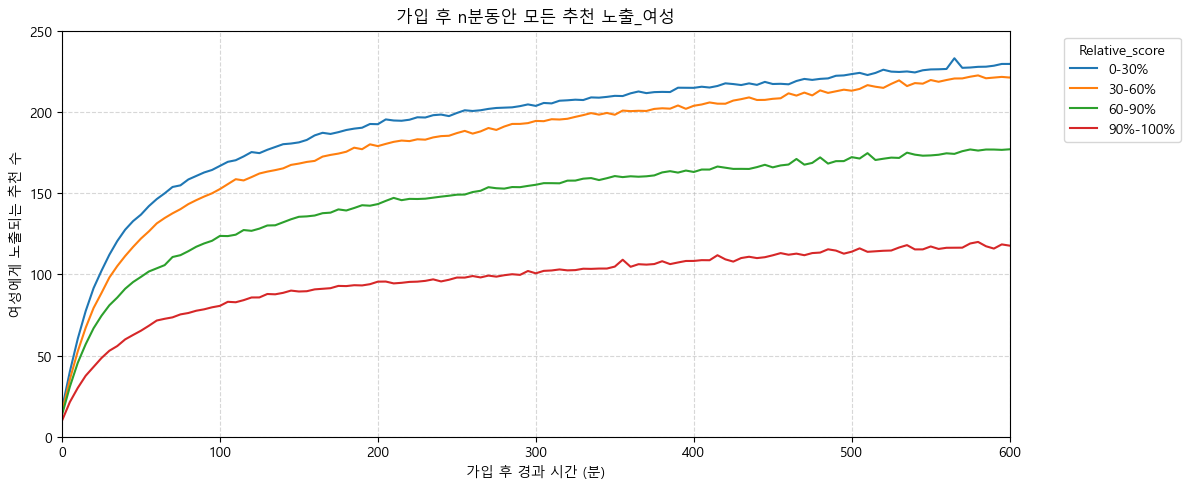

In [189]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_plot_2way, x='time', y='cumul_rcmd_impression_users', hue='grade')

plt.title('가입 후 n분동안 모든 추천 노출_여성')
plt.xlim(0,600); plt.xlabel('가입 후 경과 시간 (분)')
plt.ylim(0,250); plt.ylabel('여성에게 노출되는 추천 수')
plt.legend(title='relative score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
handles, _ = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=custom_labels, title='Relative_score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

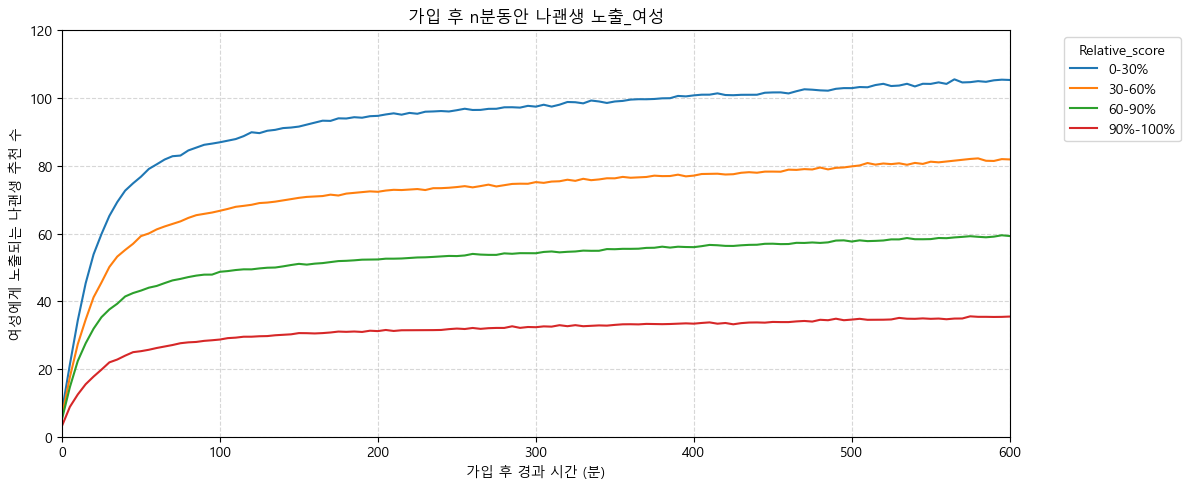

In [191]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_plot_2way, x='time', y='cumul_rcmd_impression_users_rcmded', hue='grade')

plt.title('가입 후 n분동안 나괜생 노출_여성')
plt.xlim(0,600); plt.xlabel('가입 후 경과 시간 (분)')
plt.ylim(0,120); plt.ylabel('여성에게 노출되는 나괜생 추천 수')
plt.legend(title='relative score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
handles, _ = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=custom_labels, title='Relative_score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

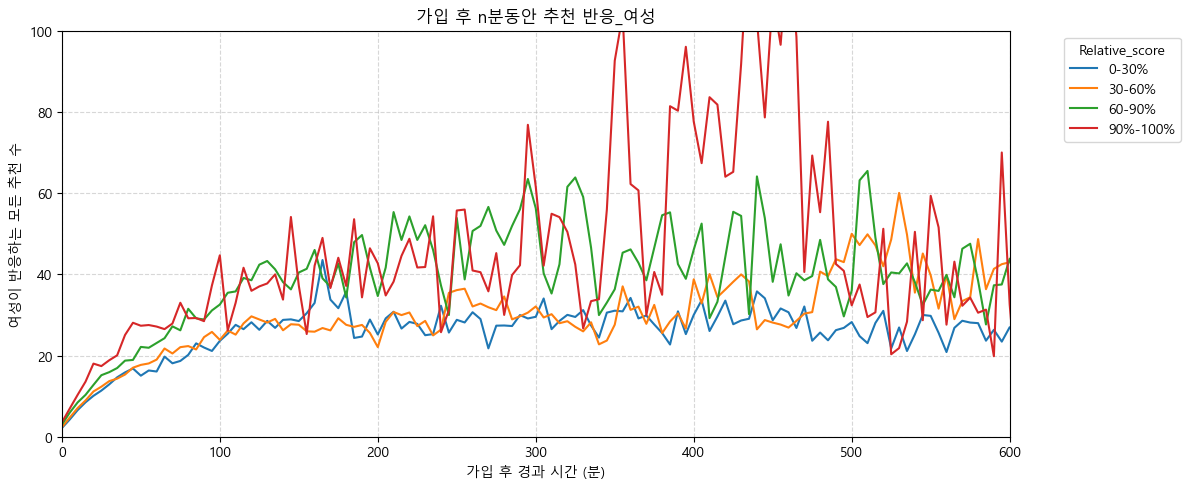

In [180]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_plot_2way_2, x='time', y='cumul_rcmd_response_users', hue='grade')

plt.title('가입 후 n분동안 추천 반응_여성')
plt.xlim(0,600); plt.xlabel('가입 후 경과 시간 (분)')
plt.ylim(0,100); plt.ylabel('여성이 반응하는 모든 추천 수')
plt.legend(title='relative score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
handles, _ = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=custom_labels, title='Relative_score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

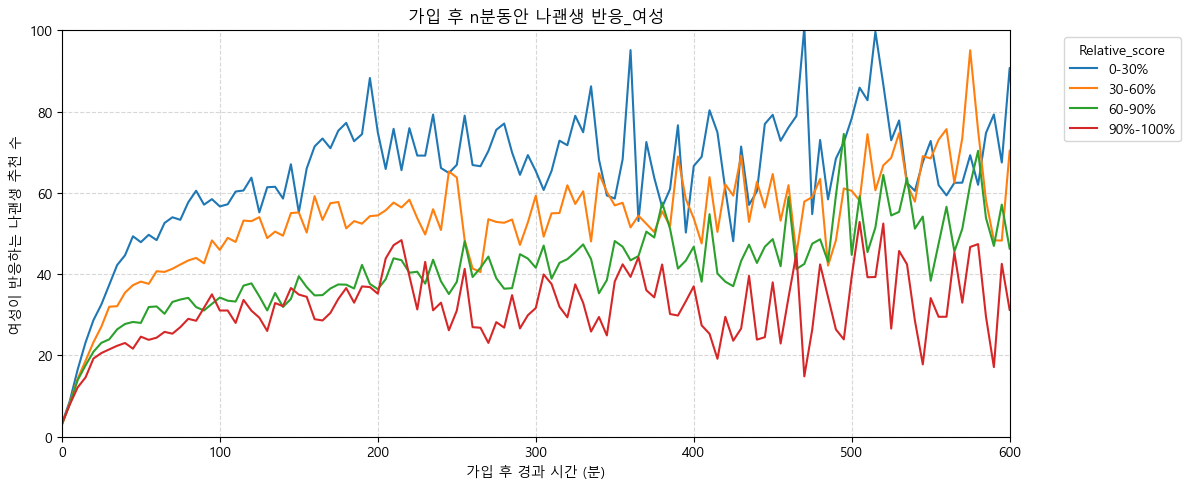

In [181]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_plot_2way_2, x='time', y='cumul_rcmd_response_users_rcmded', hue='grade')

plt.title('가입 후 n분동안 나괜생 반응_여성')
plt.xlim(0,600); plt.xlabel('가입 후 경과 시간 (분)')
plt.ylim(0,100); plt.ylabel('여성이 반응하는 나괜생 추천 수')
plt.legend(title='relative score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
handles, _ = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=custom_labels, title='Relative_score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [183]:
df_rr_2.head()

,id,relative_score,minute_offset,user_id,user1_relative_score,date_ymd_kst,hour_kst,min_rc,user2_location,rcmd_users,rcmd_impression_users,rcmd_response_users,rcmd_request_users,rcmd_users_rcmded,rcmd_impression_users_rcmded,rcmd_response_users_rcmded,rcmd_request_users_rcmded,cumul_rcmd_users,cumul_rcmd_impression_users,cumul_rcmd_response_users,cumul_rcmd_request_users,cumul_rcmd_users_rcmded,cumul_rcmd_impression_users_rcmded,cumul_rcmd_response_users_rcmded,cumul_rcmd_request_users_rcmded,grade,time
0,3716861,19.471814,2,3716861,19.471814,2025-12-22,16,2,대전,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1.0,10
1,6712824,10.210909,60,6712824,10.138076,2025-12-26,12,60,부산,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.0,300
2,6712824,10.210909,61,6712824,10.138076,2025-12-26,17,61,부산,2,2,0,0,0,0,0,0,3,3,1,1,1,1,1,1,1.0,305
3,6712824,10.210909,62,6712824,10.138076,2025-12-26,17,62,부산,18,18,2,0,0,0,0,0,21,21,3,1,1,1,1,1,1.0,310
4,6712824,10.210909,62,6712824,10.138076,2025-12-26,16,62,부산,1,1,1,0,0,0,0,0,22,22,4,1,1,1,1,1,1.0,310


In [184]:
df_rr_2.describe()

,id,relative_score,minute_offset,user_id,user1_relative_score,hour_kst,min_rc,rcmd_users,rcmd_impression_users,rcmd_response_users,rcmd_request_users,rcmd_users_rcmded,rcmd_impression_users_rcmded,rcmd_response_users_rcmded,rcmd_request_users_rcmded,cumul_rcmd_users,cumul_rcmd_impression_users,cumul_rcmd_response_users,cumul_rcmd_request_users,cumul_rcmd_users_rcmded,cumul_rcmd_impression_users_rcmded,cumul_rcmd_response_users_rcmded,cumul_rcmd_request_users_rcmded,grade,time
count,1.690770e+05,169077.000000,169077.000000,1.690770e+05,169077.000000,169077.000000,169077.000000,169077.000000,169077.000000,169077.000000,169077.000000,169077.000000,169077.000000,169077.000000,169077.000000,169077.000000,169077.000000,169077.000000,169077.000000,169077.000000,169077.000000,169077.000000,169077.000000,169077.000000,169077.000000
mean,7.988097e+06,45.658523,84.423848,7.988097e+06,45.613721,13.136914,84.423848,9.414699,8.648113,1.506769,0.025426,2.235733,2.074061,2.235733,0.010066,222.101776,208.413877,30.653566,0.469532,48.735931,45.596823,48.735931,0.196922,2.049569,422.119242
std,5.411546e+05,27.254695,90.221144,5.411546e+05,27.263185,7.652003,90.221144,13.015267,12.756163,3.721571,0.193975,7.102598,6.773718,7.102598,0.114816,336.923109,332.660433,68.851237,1.184055,63.487969,61.833433,63.487969,0.645195,0.921714,451.105721
min,2.427440e+05,0.053987,0.000000,2.427440e+05,0.061359,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8.059281e+06,22.790732,9.000000,8.059281e+06,22.742555,7.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.000000,34.000000,5.000000,0.000000,2.000000,1.000000,2.000000,0.000000,1.000000,45.000000
50%,8.071493e+06,43.812019,41.000000,8.071493e+06,43.778766,15.000000,41.000000,4.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,117.000000,103.000000,14.000000,0.000000,19.000000,16.000000,19.000000,0.000000,2.000000,205.000000
75%,8.082482e+06,66.801741,151.000000,8.082482e+06,66.859556,20.000000,151.000000,12.000000,11.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,261.000000,243.000000,33.000000,0.000000,77.000000,71.000000,77.000000,0.000000,3.000000,755.000000
max,8.093487e+06,100.000000,288.000000,8.093487e+06,99.944747,23.000000,288.000000,150.000000,150.000000,125.000000,7.000000,141.000000,141.000000,141.000000,6.000000,4693.000000,4693.000000,2433.000000,15.000000,445.000000,445.000000,445.000000,10.000000,4.000000,1440.000000
